#### 3.6 정규분포와 응용
- 시뮬레이션 없이 계산만으로 다양한 것을 알 수 있다
- 확률밀도함수를 이용하는 방법, 파이썬으로 구현하는 방법
- 표본분포로 t분포 도입

##### 3.6.1 라이브러리 임포트

##### 3.6.2 확률밀도
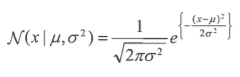

In [175]:
sp.pi #원주율 값

3.141592653589793

In [176]:
np.exp(1) #e^1

2.718281828459045

In [179]:
# 확률변수가 3일 때의 확률밀도
x = 3
mu = 4
sigma = 0.8
1 / (np.sqrt(2 * sp.pi * sigma**2)) * \
    np.exp(-((x - mu) **2) / (2 * sigma**2))

0.22831135673627742

In [181]:
stats.norm.pdf(loc = 4, scale = 0.8, x = 3)

0.2283113567362774

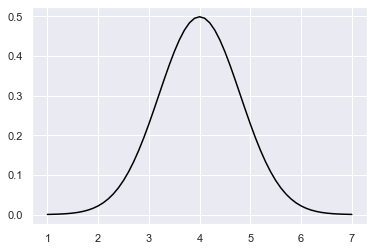

In [183]:
x_plot = np.arange(start = 1, stop = 7.1, step = 0.1)
plt.plot(
    x_plot,
    stats.norm.pdf(x = x_plot, loc = 4, scale = 0.8),
    color = 'black'
)

##### 3.6.3 표본이 어떤 값 이하가 되는 비율
- 어떤 값 이하가 되는 데이터의 개수 / 샘플사이즈

In [184]:
# 평균4, 표준편차 0.8인 모집단에서 표본추출
np.random.seed(1)
simulated_sample = stats.norm.rvs(
    loc = 4, scale = 0.8, size = 100000)
simulated_sample

array([5.29947629, 3.51059487, 3.5774626 , ..., 4.06498025, 4.27523694,
       3.401955  ])

In [187]:
# 3이하인 데이터의 개수
np.sum(simulated_sample <= 3)

10371

In [188]:
# 샘플사이즈로 나눔
np.sum(simulated_sample <= 3) / len(simulated_sample)

0.10371

##### 3.6.4 누적분포함수
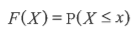
- F(x)를 누적분포함수 또는 분포함수라고 한다  
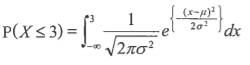
- 확률 밀도를 전부 더한 것
- 파이썬 stats.norm의 cdf(Cumulative Distribution Function)

In [189]:
# 평균4, 표준편차0.8인 모집단분포에서 얻은 확률변수가 3 이하가 될 확률
stats.norm.cdf(loc = 4, scale = 0.8, x=3)

0.10564977366685535

In [190]:
# 정규분포는 평균에 대해 좌우대칭
stats.norm.cdf(loc = 4, scale = 0.8, x = 4)

0.5

##### 3.6.5 하측확률과 퍼센트포인트
- 하측확률:데이터가 어떤 값 이하가 될 확률
- 퍼센트포인트:어떤 확률이 될 기준치
- 퍼센트포인트 계산 stats.norm의 ppf함수(Percent Point Function)

In [191]:
# 하측롹률이 2.5%가 되는 퍼센트포인트
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.025)

2.4320288123679563

In [192]:
# 3 이하가 될 확률
lower = stats.norm.cdf(loc = 4, scale = 0.8, x = 3)
# 퍼센트포인트를 구하는 ppf의 인자로 cdf함수의 결과를 넣음
stats.norm.ppf(loc = 4, scale = 0.8, q = lower)

3.0000000000000004

In [193]:
# 하측확률이 50%가 되는 퍼센트포인트는 평균과 일치
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.5)

4.0

##### 3.6.6 표준정규분포
- 평균 0, 분산(표준편차) 1인 정규분포

##### 3.6.7 t값
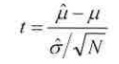
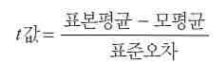

##### 3.6.8 t값의 표본분포
1. 모집단분포가 인 모집단에서 표본추출 시뮬레이션. 샘플사이즈 10
2. 얻은 표본에서 표본평균 구함
3. 얻은 표본에서 표준오차 구함. 표준오차는 표본평균의 표준편차로 간주
4. (표본평균 - 모평균) / 표준오차 계산으로 t값을 계산
5. 이 시행을 10000번 반복

In [231]:
# 난수 시드 설정
np.random.seed(1)
# t값을 저장할 변수 설정
t_value_array = np.zeros(10000)
# 정규분포의 클래스의 인스턴스
norm_dist = stats.norm(loc = 4, scale = 0.8)
# 시뮬레이션 실행
for i in range(0, 10000):
    sample = norm_dist.rvs(size = 10)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof = 1)
    sample_se = sample_std / np.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4) / sample_se

c:\users\82102\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


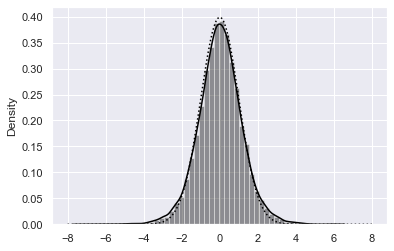

In [232]:
# t값의 히스토그램
sns.distplot(t_value_array, color = 'black')
# 표준정규분포의 확률밀도
x = np.arange(start = -8, stop = 8.1, step = 0.1)
plt.plot(x, stats.norm.pdf(x = x), color = 'black', linestyle = 'dotted')